# Análisis estadístico

## Obtención de base de datos

In [235]:
import mysql.connector as connection
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [236]:
def queryDF(q) -> pd.DataFrame:
    try:
        mydb = connection.connect(host="localhost", database = 'practica',user="root", passwd="root", use_pure=True)
        result_dataFrame = pd.read_sql(q, mydb)
    except Exception as e:
        print('Excepcion', str(e))
        result_dataFrame = None
    finally:
        mydb.close()
    return result_dataFrame

In [237]:
empleados = queryDF('select * from em_empleados')

C:\Users\eyuste\AppData\Local\Temp\ipykernel_18128\2671971924.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_dataFrame = pd.read_sql(q, mydb)


In [238]:
empleados.head()

,B_SERVMILITAR,CX_EDOCIVIL,F_ALTA,F_BAJA,F_NACIMIENTO,ID_EMPLEADO,N_TELEFONO1,N_TELEFONO2,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,TX_NIF,TX_NOMBRE
0,N,C,1984-12-27,None,1986-02-18,1,206659192,651894996,White,Phillips,alfred.white@gmail.com,88953399G,Alfred
1,N,S,1995-05-23,None,1993-03-25,2,530089955,363562170,Hamilton,Welch,leila.hamilton@gmail.com,42401933C,Leila
2,N,C,1965-09-12,None,1968-10-23,3,685914896,786964436,Fletcher,Wilson,bertie.fletcher@gmail.com,52971090P,Bertie
3,N,S,1996-08-18,None,1991-10-17,4,544312981,973476153,Adkins,Butler,barry.adkins@gmail.com,41056311G,Barry
4,N,S,2006-11-20,None,1979-06-16,5,530855714,800507080,Morgan,Bates,emma.morgan@gmail.com,70090020R,Emma


## Estadísticas

#### Empleados
- Top 5 empleados que más años llevan en la compañía
- Top 5 empleados más recientes
- Distribución del número de años de los empleados en la empresa
- Evolución temporal de altas por años
- Evolución temporal de bajas por años (se puede combinar con la anterior si se desea)
- ¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?
- Distribución de empleados solteros vs casados
- Distribución de la edad de los empleados
- Edad media y desviación típica de los empleados

#### Proyectos
- Número de proyectos activos, finalizados y total
- Distribución de la duración de los proyectos (histograma)
- Distribución de proyectos por lugar

#### Proyectos y Empleados
- Distribución del número de proyectos a los que están asignados los empleados en activo. 
- Ejemplo: 
	- Personas asignadas a 1 proyecto: 54, 
	- Personas asignadas a 2 proyectos: 12,
	- Personas asignadas a 3 proyectos: 2
- Top 5 proyectos con más personas asignadas
- Lista de proyectos sin personas asignadas (detección de anomalía)  


### Empleados

#### Top 5 empleados que más años llevan en la compañía

In [239]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Ordenar por antiguedad
ordenados = disponibles.sort_values(['F_ALTA'])[
    ['TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'TX_EMAIL', 'F_ALTA']]
# Limitar a los 5
top5MasAnyos = ordenados.head(5)
top5MasAnyos

,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,F_ALTA
40,13761491E,Isabelle,Lloyd,Jones,isabelle.lloyd@gmail.com,1936-07-13
19,27194980B,Jorge,Pierce,Conner,jorge.pierce@gmail.com,1939-06-18
42,70866763E,Esther,Wilkerson,Todd,esther.wilkerson@gmail.com,1939-12-17
20,37621966W,Troy,Hawkins,Hawkins,troy.hawkins@gmail.com,1940-07-20
10,86501636G,Adrian,Clark,Cooper,adrian.clark@gmail.com,1946-01-04


#### Top 5 empleados más recientes

In [240]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Ordenar por antiguedad
ordenados = disponibles.sort_values(['F_ALTA'], ascending=False)[
    ['TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'TX_EMAIL', 'F_ALTA']]
# Limitar a los 5
top5MasRecientes = ordenados.head(5)
top5MasRecientes

,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,F_ALTA
46,87541974K,Devin,Bailey,Hunt,devin.bailey@gmail.com,2018-08-17
16,90151977P,Leah,Pena,Pierce,leah.pena@gmail.com,2017-06-16
89,14136084Y,Evelyn,Carter,Chambers,evelyn.carter@gmail.com,2015-07-05
59,34065433J,David,Jensen,Park,david.jensen@gmail.com,2014-08-09
54,79260073L,Jimmy,Wong,Schneider,jimmy.wong@gmail.com,2012-10-22


#### Distribución del número de años de los empleados en la empresa

<Axes: ylabel='Frequency'>

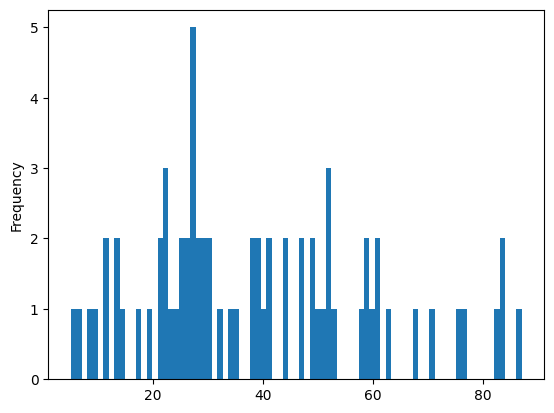

In [250]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Numero de años
anyosAlta = disponibles['F_ALTA'].astype('str').str.split('-').str[0].astype('int')
nAnyos = 2023 - anyosAlta

nAnyos.plot.hist(bins=nAnyos.max() - nAnyos.min() + 1)

#### Evolución temporal de altas por años y Evolución temporal de bajas por años

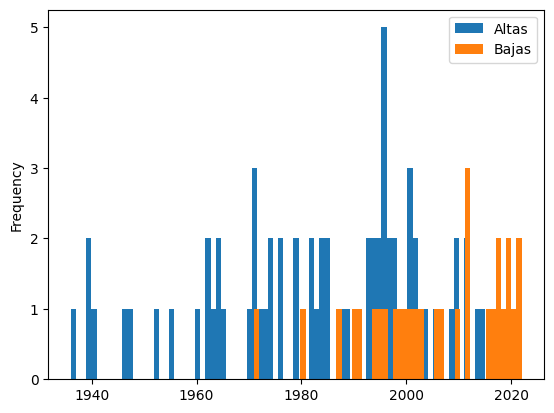

In [251]:
# Dados de baja
deBaja = empleados.loc[empleados['F_BAJA'].notna()].copy()
anyosBaja = deBaja['F_BAJA'].astype('str').str.split('-').str[0].astype('int')

anyosAlta.plot.hist(bins=anyosAlta.max() - anyosAlta.min() + 1, label='Altas')
anyosBaja.plot.hist(bins=anyosBaja.max() - anyosBaja.min() + 1, label='Bajas')
plt.legend()


#### ¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?

In [243]:
anyosCrecimiento = anyosAlta.value_counts().sort_values(ascending=False).head(2).reset_index()
anyosDecrecimiento = anyosBaja.value_counts().sort_values(ascending=False).head(2).reset_index()

print(
    'Mayor crecimiento: ',
    ', '.join([
        f'{y} con {n} altas'
        for y, n in zip(anyosCrecimiento['F_ALTA'], anyosCrecimiento['count'])]))

print(
    'Mayor decrecimiento: ',
    ', '.join([
        f'{y} con {n} bajas'
        for y, n in zip(anyosDecrecimiento['F_BAJA'], anyosDecrecimiento['count'])]))


Mayor crecimiento:  1996 con 5 altas, 1971 con 3 altas
Mayor decrecimiento:  2012 con 3 bajas, 2018 con 2 bajas



#### Distribución de empleados solteros vs casados

<Axes: ylabel='Frecuencia entre todos'>

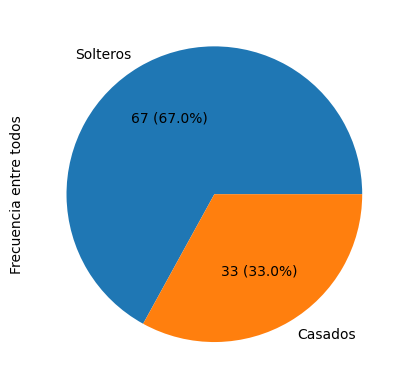

In [244]:
ecivil = empleados['CX_EDOCIVIL'].value_counts()
ecivil = ecivil
ecivil.plot.pie(
    label='Frecuencia entre todos',
    labels = ['Solteros', 'Casados'],
    autopct=lambda x: f'{round(x * len(empleados) / 100)} ({round(x, 2)}%)')


<Axes: ylabel='Frecuencia entre los no dados de baja'>

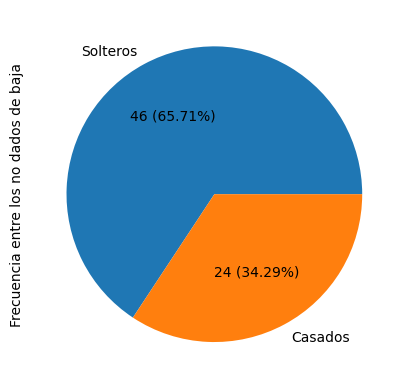

In [245]:
ecivil = disponibles['CX_EDOCIVIL'].value_counts()
ecivil = ecivil
ecivil.plot.pie(
    label='Frecuencia entre los no dados de baja',
    labels = ['Solteros', 'Casados'],
    autopct=lambda x: f'{round(x * len(disponibles) / 100)} ({round(x, 2)}%)')


#### Distribución de la edad de los empleados

<Axes: ylabel='Frequency'>

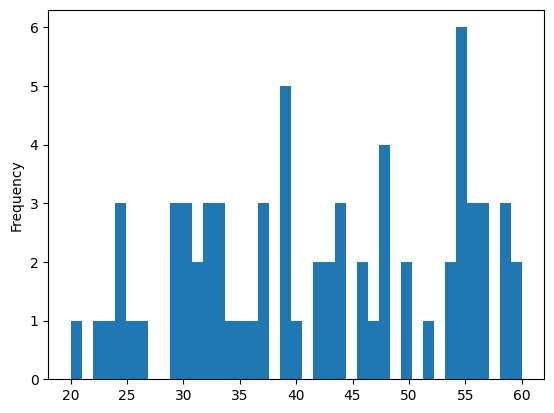

In [246]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Edad de años
year = datetime.now().year
edadEmpleados = year - disponibles['F_NACIMIENTO'].astype('str').str.split('-').str[0].astype('int')

edadEmpleados.plot.hist(bins=edadEmpleados.max() - edadEmpleados.min() + 1)


#### Edad media y desviación típica de los empleados

In [257]:
media, std = edadEmpleados.mean(), edadEmpleados.std()

print('La edad media es', round(media, 1), 'años y la desviación típica', round(std, 2))
print('Por lo que el ~68% de las edades están entre', round(media - std, 1), 'y', round(media + std, 1))

La edad media es 41.9 años y la desviación típica 11.6
Por lo que el ~68% de las edades están entre 30.3 y 53.5


### Proyectos


#### Número de proyectos activos, finalizados y total


#### Distribución de la duración de los proyectos (histograma)


#### Distribución de proyectos por lugar

### Proyectos y empleados

#### Distribución del número de proyectos a los que están asignados los empleados en activo. 
Ejemplo: 
- Personas asignadas a 1 proyecto: 54, 
- Personas asignadas a 2 proyectos: 12,
- Personas asignadas a 3 proyectos: 2


#### Top 5 proyectos con más personas asignadas


#### Lista de proyectos sin personas asignadas (detección de anomalía) 